In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('dog_rates_tweets.csv', parse_dates=[1])

In [3]:
ratings = data['text'].str.extract(r'(\d+(\.\d+)?)/10', expand=False)  #extract ratings from the 'text' column

In [4]:
data.insert(3, 'rating', ratings[0])      #insert ratings data into new column named 'rating'


In [5]:
data['rating'] = pd.to_numeric(data['rating'])                    #convert column values to numerical
clean_data = data.dropna(axis=0, how='any', subset=['rating'])    #drop rows containing 'NaN'

In [6]:
filtered_data = clean_data[clean_data['rating'] < 20]       #only keep ratings under 20

In [7]:
def to_timestamp(x):         #function to convert datetime objects to numbers so that regression line calc. later
    return x.timestamp()

In [8]:
filtered_data['timestamp'] = filtered_data['created_at'].apply(to_timestamp)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [9]:
regression_line = stats.linregress(filtered_data['timestamp'], filtered_data['rating'])    #calculates regression line

In [10]:
regression_line.pvalue                    #the p-value

1.0836168506032591e-104

In [11]:
X = filtered_data['timestamp'][:, np.newaxis]      #add a dimension to an array because sckit-learn takes 2D input

model = LinearRegression(fit_intercept=True)
model.fit(X, filtered_data['rating'])
#print(model.coef_[0], model.intercept_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
predictions = model.predict(X)

In [13]:
residuals = filtered_data['rating'] - model.predict(X)

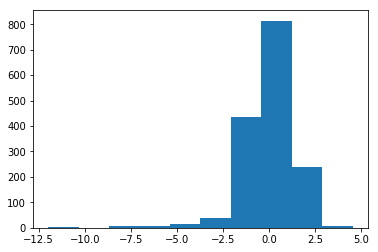

In [14]:
plt.hist(residuals)
plt.show()